<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day7_sportsMangement_chatbot_assistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day 7: Chatbot Assistant

enhanced-chatbot-interface.svg

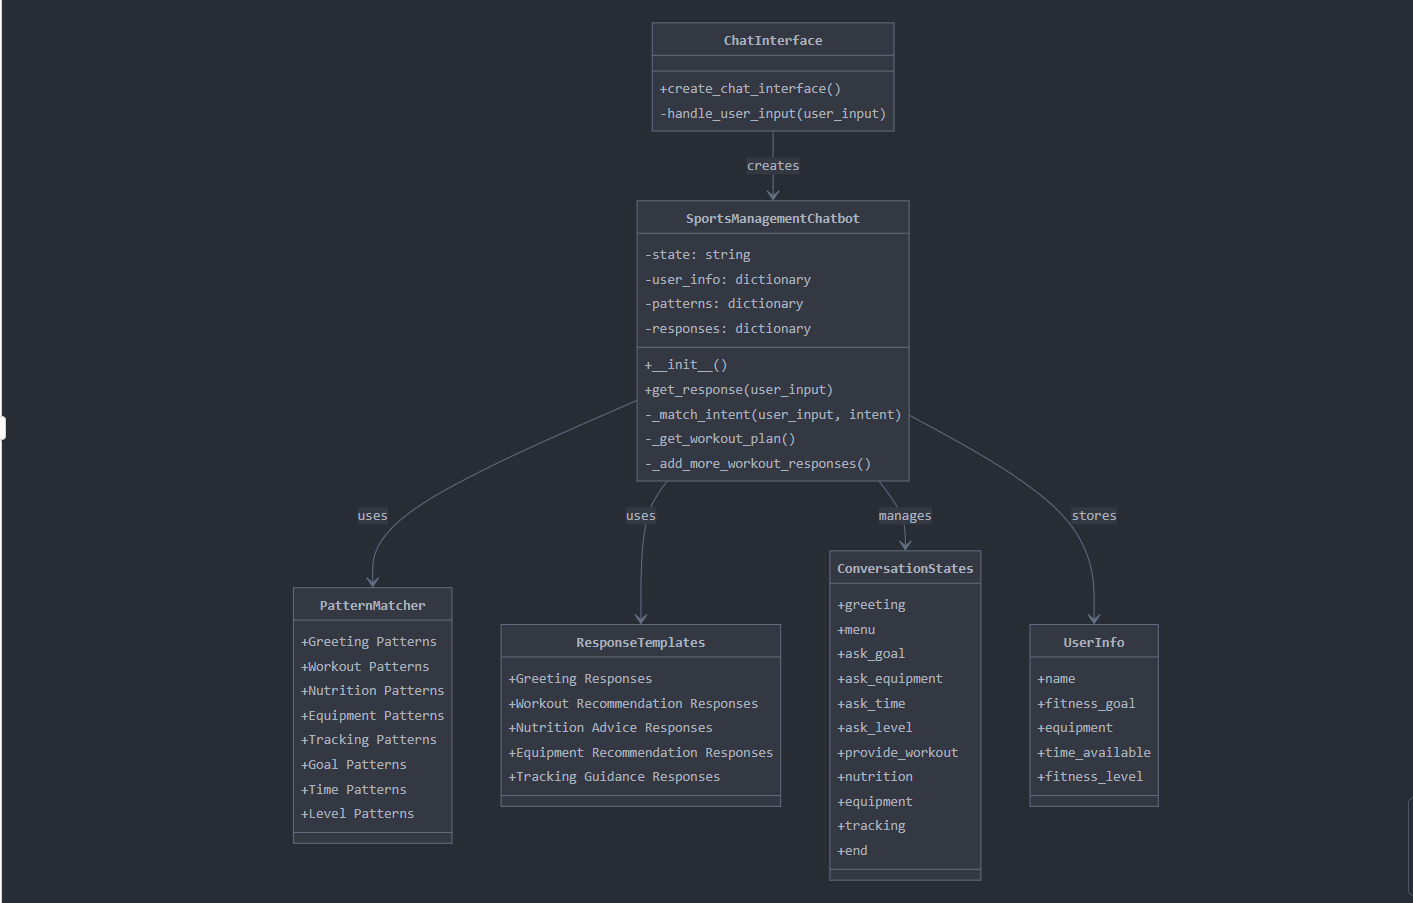

chatbot-interface.svg

**Core Concept:** Dialogue systems

**Understanding the Task**

For this project, we'll be creating a rule-based chatbot that can handle conversations in a specific domain. This type of chatbot relies on predefined rules and patterns rather than machine learning.

**Key Components:**


*   **Intent Recognition** - Identifying what the user wants

*  **Response Generation**- Providing appropriate answers
*   **Conversation Flow** - Managing the dialogue state


*   **Domain Knowledge** - Rules specific to our chosen domain



**This project helped us understand the difference between:**

**Rule-based AI** (what we  going to build) - Using explicit patterns and predetermined responses

**ML-based AI**(more advanced) - Using machine learning to understand intent and generate responses

**Setting Up Basic Structure for our  Sports Management Chatbot:**

In [52]:
import re
import random
from IPython.display import display, HTML, Javascript
from google.colab import output

**Define the Complete Chatbot Class**




In [53]:
class SportsManagementChatbot:
    def __init__(self):
        # Bot state
        self.state = "greeting"
        self.user_info = {
            "name": None,
            "fitness_goal": None,
            "equipment": None,
            "time_available": None,
            "fitness_level": None
        }

        # Define intents and patterns
        self.patterns = {
            "greeting": [
                r"hello", r"hi", r"hey", r"greetings", r"what's up", r"sup",
                r"start", r"begin", r"help"
            ],
            "workout": [
                r"workout", r"exercise", r"training", r"routine", r"program",
                r"exercises", r"workouts", r"train"
            ],
            "nutrition": [
                r"nutrition", r"diet", r"food", r"meal", r"eat", r"protein",
                r"calories", r"carbs", r"carbohydrates", r"fat"
            ],
            "equipment": [
                r"equipment", r"gear", r"tools", r"machine", r"weights", r"dumbbell",
                r"barbell", r"device", r"band", r"mat"
            ],
            "tracking": [
                r"track", r"monitor", r"log", r"record", r"progress", r"journal",
                r"diary", r"stats", r"statistics", r"metrics", r"measure"
            ],
            "goal_strength": [
                r"strength", r"strong", r"muscle", r"build muscle", r"power",
                r"gain muscle", r"muscular", r"toning", r"tone"
            ],
            "goal_weight_loss": [
                r"weight loss", r"lose weight", r"burn fat", r"slim", r"calorie deficit",
                r"slimming", r"fat loss", r"leaner", r"thin"
            ],
            "goal_endurance": [
                r"endurance", r"stamina", r"cardio", r"aerobic", r"energy",
                r"run", r"running", r"marathon", r"long distance", r"cardiovascular"
            ],
            "goal_flexibility": [
                r"flexibility", r"flexible", r"stretch", r"stretching", r"mobility",
                r"yoga", r"range of motion", r"supple"
            ],
            "equipment_home": [
                r"home", r"house", r"apartment", r"room", r"living room", r"bedroom", r"limited"
            ],
            "equipment_gym": [
                r"gym", r"fitness center", r"health club", r"weights room",
                r"commercial gym", r"full equipment"
            ],
            "equipment_none": [
                r"no equipment", r"bodyweight", r"nothing", r"don't have", r"no gear",
                r"empty handed", r"just myself", r"without equipment"
            ],
            "time_short": [
                r"15 min", r"short", r"quick", r"brief", r"fast", r"15 minutes", r"twenty minutes",
                r"20 min", r"not much time", r"little time", r"busy"
            ],
            "time_medium": [
                r"30 min", r"medium", r"moderate", r"half hour", r"half an hour", r"30 minutes",
                r"not too long", r"some time"
            ],
            "time_long": [
                r"60 min", r"hour", r"long", r"full", r"complete", r"1 hour", r"one hour",
                r"plenty of time", r"lot of time", r"60 minutes"
            ],
            "level_beginner": [
                r"beginner", r"starting", r"newbie", r"novice", r"just beginning",
                r"new", r"starter", r"starting out", r"never before"
            ],
            "level_intermediate": [
                r"intermediate", r"some experience", r"familiar", r"not new",
                r"not beginner", r"moderate experience", r"practiced before"
            ],
            "level_advanced": [
                r"advanced", r"experienced", r"expert", r"veteran", r"athletic",
                r"very fit", r"trained", r"elite", r"professional"
            ],
            "affirm": [
                r"yes", r"yeah", r"yep", r"sure", r"ok", r"okay", r"correct",
                r"right", r"good", r"great", r"perfect", r"absolutely"
            ],
            "deny": [
                r"no", r"nope", r"nah", r"not", r"don't", r"isn't", r"never",
                r"negative"
            ],
            "thanks": [
                r"thanks", r"thank you", r"appreciate", r"grateful", r"nice",
                r"helpful", r"awesome"
            ],
            "bye": [
                r"bye", r"goodbye", r"see you", r"farewell", r"end", r"finish",
                r"quit", r"exit"
            ],
            "name": [
                r"(?:my name is|I'm|I am) ([\w\s]+)", r"call me ([\w\s]+)"
            ]
        }

        # Define responses
        self.responses = {
            "greeting": [
                "Hi there! I'm your personal sports management assistant. I can help with workout plans, nutrition advice, or equipment recommendations. What can I help you with today?",
                "Hello! Welcome to your fitness assistant. Would you like help with workouts, nutrition, or tracking your progress?",
                "Hey there! Ready to work on your fitness goals? I can assist with training plans, nutrition guidance, or equipment advice."
            ],
            "workout_ask_goal": [
                "What's your primary fitness goal? (strength, weight loss, endurance, or flexibility)",
                "Great! What are you looking to achieve with your workouts? Strength, weight loss, endurance, or flexibility?",
                "I'd be happy to suggest some workouts! What's your main fitness goal right now?"
            ],
            "workout_ask_equipment": [
                "What equipment do you have access to? (home, gym, or no equipment)",
                "Do you work out at home, at a gym, or prefer no-equipment exercises?",
                "What kind of equipment can you use for your workouts?"
            ],
            "workout_ask_time": [
                "How much time do you have for your workout? (15 min, 30 min, or 60 min)",
                "How long can you exercise? (short ~15 min, medium ~30 min, or long ~60 min)",
                "How much time would you like to spend on your workout today?"
            ],
            "workout_ask_level": [
                "What's your fitness level? (beginner, intermediate, or advanced)",
                "Would you consider yourself a beginner, intermediate, or advanced when it comes to fitness?",
                "How would you rate your fitness experience? Beginner, intermediate, or advanced?"
            ],
            "nutrition": [
                "I can help with nutrition advice! Are you looking for meal plans, pre/post workout nutrition, or general healthy eating tips?",
                "Nutrition is key to fitness success! Would you like suggestions for meals, snacks, or information about macronutrients?",
                "Ready to fuel your fitness? I can provide meal ideas, nutrition timing advice, or general diet suggestions."
            ],
            "equipment": [
                "I can recommend equipment based on your fitness goals. What are you training for primarily?",
                "Looking for gear recommendations? Let me know what type of training you're focusing on.",
                "Equipment can make a big difference! What kinds of workouts do you typically do?"
            ],
            "tracking": [
                "Tracking progress is important! Would you like tips on monitoring your workouts, nutrition, or body measurements?",
                "I can help you track your fitness journey! Are you interested in logging workouts, nutrition, or progress photos?",
                "Ready to monitor your progress? I can suggest ways to track your workouts, nutrition, or physical changes."
            ],
            "workout_strength_home_short_beginner": [
                "Here's a quick 15-minute strength workout for beginners at home:\n1. Push-ups (on knees if needed) - 3 sets of 8\n2. Bodyweight squats - 3 sets of 10\n3. Plank - 3 sets, hold for 20 seconds\n4. Glute bridges - 3 sets of 12\nRest 30 seconds between exercises."
            ],
            "workout_strength_home_short_intermediate": [
                "Try this 15-minute intermediate strength workout at home:\n1. Push-ups - 3 sets of 12\n2. Lunges - 3 sets of 10 each leg\n3. Tricep dips on chair - 3 sets of 12\n4. Plank - 3 sets, hold for 45 seconds\nRest 20 seconds between exercises."
            ],
            "workout_strength_home_short_advanced": [
                "Here's an intense 15-minute advanced home strength circuit:\n1. Plyometric push-ups - 4 sets of 10\n2. Pistol squats - 3 sets of 6 each leg\n3. Pull-ups (if you have a bar) or Superman holds - 4 sets of 8\n4. Burpees - 3 sets of 15\nRest only 15 seconds between exercises."
            ],
            "workout_strength_gym_short_beginner": [
                "Try this quick 15-minute gym strength workout for beginners:\n1. Machine chest press - 3 sets of 10\n2. Lat pulldown - 3 sets of 10\n3. Leg press - 3 sets of 12\n4. Seated dumbbell shoulder press - 3 sets of 10\nUse moderate weight, rest 30-45 seconds between sets."
            ],
            "fallback": [
                "I didn't quite catch that. Can you rephrase?",
                "I'm not sure I understand. Could you try asking in a different way?",
                "I'm still learning! Could you say that again differently?"
            ],
            "thanks_response": [
                "You're welcome! Anything else I can help with?",
                "Happy to help! Let me know if you need anything else.",
                "My pleasure! Feel free to ask if you have other questions."
            ],
            "bye_response": [
                "Goodbye! Have a great workout!",
                "See you next time! Stay active!",
                "Bye for now! Keep crushing those fitness goals!"
            ]
        }

        # Add more workout recommendations here for various combinations
        self._add_more_workout_responses()

    def _add_more_workout_responses(self):
        """Add more workout responses for various combinations"""
        # Weight loss workouts
        self.responses["workout_weight_loss_home_short_beginner"] = [
            "Here's a quick 15-minute weight loss workout for beginners at home:\n1. Jumping jacks - 30 seconds\n2. Wall sit - 30 seconds\n3. High knees - 30 seconds\n4. Push-ups (modified) - 30 seconds\nRepeat 3 times with 15 seconds rest between exercises."
        ]

        self.responses["workout_weight_loss_none_medium_beginner"] = [
            "Try this 30-minute beginner weight loss workout with no equipment:\n1. Jumping jacks - 1 minute\n2. Bodyweight squats - 1 minute\n3. Mountain climbers - 30 seconds\n4. Rest - 30 seconds\n5. High knees - 1 minute\n6. Plank - 30 seconds\nRepeat 4 times."
        ]

        self.responses["workout_endurance_none_medium_intermediate"] = [
            "Here's a 30-minute intermediate endurance workout with no equipment:\n1. Jog in place - 2 minutes\n2. Burpees - 45 seconds\n3. Rest - 15 seconds\n4. Mountain climbers - 45 seconds\n5. Rest - 15 seconds\n6. High knees - 1 minute\nRepeat 5 times."
        ]

        # Add nutrition responses
        self.responses["nutrition_strength"] = [
            "For muscle building, focus on protein intake (1.6-2.2g per kg bodyweight). Good sources include chicken, eggs, fish, tofu, and protein supplements. Don't forget carbs for energy and healthy fats. Try to eat every 3-4 hours with protein in each meal."
        ]

        self.responses["nutrition_weight_loss"] = [
            "For weight loss, create a moderate calorie deficit (300-500 calories below maintenance). Focus on high-protein foods that keep you full, plenty of vegetables, and drink water before meals. Consider intermittent fasting if it fits your lifestyle."
        ]

**Implement the get_response Method**

In [59]:
def get_response(self, user_input):
        """Generate a response based on user input and current state"""
        user_input = user_input.lower().strip()

        # Check for exit command
        if self._match_intent(user_input, "bye"):
            self.state = "end"
            return random.choice(self.responses["bye_response"])

        # Check for thanks
        if self._match_intent(user_input, "thanks"):
            return random.choice(self.responses["thanks_response"])

        # Extract name if present
        name_match = None
        for pattern in self.patterns["name"]:
            match = re.search(pattern, user_input)
            if match:
                name_match = match.group(1).strip()
                break

        if name_match and self.user_info["name"] is None:
            self.user_info["name"] = name_match
            return f"Nice to meet you, {name_match}! How can I help with your fitness journey today?"

        # Handle different states
        if self.state == "greeting":
            # First interaction or reset
            if self._match_intent(user_input, "greeting"):
                self.state = "menu"
                return random.choice(self.responses["greeting"])

            elif self._match_intent(user_input, "workout"):
                self.state = "ask_goal"
                return random.choice(self.responses["workout_ask_goal"])

            elif self._match_intent(user_input, "nutrition"):
                self.state = "nutrition"
                return random.choice(self.responses["nutrition"])

            elif self._match_intent(user_input, "equipment"):
                self.state = "equipment"
                return random.choice(self.responses["equipment"])

            elif self._match_intent(user_input, "tracking"):
                self.state = "tracking"
                return random.choice(self.responses["tracking"])

            else:
                self.state = "menu"
                return random.choice(self.responses["greeting"])

        elif self.state == "menu":
            if self._match_intent(user_input, "workout"):
                self.state = "ask_goal"
                return random.choice(self.responses["workout_ask_goal"])

            elif self._match_intent(user_input, "nutrition"):
                self.state = "nutrition"
                return random.choice(self.responses["nutrition"])

            elif self._match_intent(user_input, "equipment"):
                self.state = "equipment"
                return random.choice(self.responses["equipment"])

            elif self._match_intent(user_input, "tracking"):
                self.state = "tracking"
                return random.choice(self.responses["tracking"])

            else:
                return "Would you like help with workouts, nutrition, equipment, or tracking your progress?"

        elif self.state == "ask_goal":
            if self._match_intent(user_input, "goal_strength"):
                self.user_info["fitness_goal"] = "strength"
                self.state = "ask_equipment"
                return random.choice(self.responses["workout_ask_equipment"])

            elif self._match_intent(user_input, "goal_weight_loss"):
                self.user_info["fitness_goal"] = "weight_loss"
                self.state = "ask_equipment"
                return random.choice(self.responses["workout_ask_equipment"])

            elif self._match_intent(user_input, "goal_endurance"):
                self.user_info["fitness_goal"] = "endurance"
                self.state = "ask_equipment"
                return random.choice(self.responses["workout_ask_equipment"])

            elif self._match_intent(user_input, "goal_flexibility"):
                self.user_info["fitness_goal"] = "flexibility"
                self.state = "ask_equipment"
                return random.choice(self.responses["workout_ask_equipment"])

            else:
                return "Please choose one main fitness goal: strength, weight loss, endurance, or flexibility."

        elif self.state == "ask_equipment":
            if self._match_intent(user_input, "equipment_home"):
                self.user_info["equipment"] = "home"
                self.state = "ask_time"
                return random.choice(self.responses["workout_ask_time"])

            elif self._match_intent(user_input, "equipment_gym"):
                self.user_info["equipment"] = "gym"
                self.state = "ask_time"
                return random.choice(self.responses["workout_ask_time"])

            elif self._match_intent(user_input, "equipment_none"):
                self.user_info["equipment"] = "none"
                self.state = "ask_time"
                return random.choice(self.responses["workout_ask_time"])

            else:
                return "Do you have access to a gym, home equipment, or prefer no equipment workouts?"

        elif self.state == "ask_time":
            if self._match_intent(user_input, "time_short"):
                self.user_info["time_available"] = "short"
                self.state = "ask_level"
                return random.choice(self.responses["workout_ask_level"])

            elif self._match_intent(user_input, "time_medium"):
                self.user_info["time_available"] = "medium"
                self.state = "ask_level"
                return random.choice(self.responses["workout_ask_level"])

            elif self._match_intent(user_input, "time_long"):
                self.user_info["time_available"] = "long"
                self.state = "ask_level"
                return random.choice(self.responses["workout_ask_level"])

            else:
                return "How much time do you have for your workout? Short (15 min), medium (30 min), or long (60 min)?"

        elif self.state == "ask_level":
            if self._match_intent(user_input, "level_beginner"):
                self.user_info["fitness_level"] = "beginner"
                self.state = "provide_workout"
                return self._get_workout_plan()

            elif self._match_intent(user_input, "level_intermediate"):
                self.user_info["fitness_level"] = "intermediate"
                self.state = "provide_workout"
                return self._get_workout_plan()

            elif self._match_intent(user_input, "level_advanced"):
                self.user_info["fitness_level"] = "advanced"
                self.state = "provide_workout"
                return self._get_workout_plan()

            else:
                return "Are you a beginner, intermediate, or advanced when it comes to fitness?"

        elif self.state == "provide_workout":
            self.state = "menu"
            name_prefix = f"{self.user_info['name']}, " if self.user_info['name'] else ""
            return f"{name_prefix}would you like another workout recommendation or help with something else like nutrition or equipment?"

        elif self.state == "nutrition":
            if self._match_intent(user_input, "goal_strength"):
                self.state = "menu"
                return self.responses["nutrition_strength"][0]

            elif self._match_intent(user_input, "goal_weight_loss"):
                self.state = "menu"
                return self.responses["nutrition_weight_loss"][0]

            else:
                return "What's your primary nutritional goal? Building strength/muscle, weight loss, endurance support, or general health?"

        # Fallback for unhandled states or inputs
        return random.choice(self.responses["fallback"])

**Helper Methods for the Chatbot**

In [60]:
def _match_intent(self, user_input, intent):
        """Check if any pattern in the intent matches the user input"""
        if intent not in self.patterns:
            return False

        for pattern in self.patterns[intent]:
            if re.search(pattern, user_input, re.IGNORECASE):
                return True

        return False

def _get_workout_plan(self):
        """Generate workout plan based on user info"""
        # Create the response key based on collected info
        goal = self.user_info["fitness_goal"]
        equipment = self.user_info["equipment"]
        time = self.user_info["time_available"]
        level = self.user_info["fitness_level"]

        response_key = f"workout_{goal}_{equipment}_{time}_{level}"

        # If we have a specific workout for this combination
        if response_key in self.responses:
            return random.choice(self.responses[response_key])

        # Otherwise generate a generic response
        name_greeting = f"{self.user_info['name']}, here's " if self.user_info['name'] else "Here's "

        time_desc = {"short": "15-minute", "medium": "30-minute", "long": "60-minute"}

        workout_desc = (f"{name_greeting}a {time_desc[time]} {level} {goal} workout for {equipment} training:\n"
                      f"1. Warm-up: 2-3 minutes of light cardio\n"
                      f"2. Main exercises: Focus on compound movements\n"
                      f"3. Cool down: Light stretching\n\n"
                      f"Would you like me to create a more detailed plan for this specific workout?")

        return workout_desc

**Create the Chat Interface Function**

In [61]:
def create_chat_interface():
    """Create a simple chat interface using IPython widgets"""
    from IPython.display import display, HTML, Javascript

    chatbot = SportsManagementChatbot()

    display(HTML("""
    <div style="width: 100%; max-width: 800px; margin: 0 auto; padding: 20px; font-family: Arial, sans-serif;">
        <h2 style="text-align: center; color: #4CAF50;">Sports Management Chatbot</h2>
        <div id="chat-container" style="height: 300px; border: 1px solid #ddd; padding: 10px; overflow-y: auto; margin-bottom: 10px; border-radius: 5px;"></div>
        <div style="display: flex;">
            <input id="user-input" style="flex: 1; padding: 10px; border: 1px solid #ddd; border-radius: 5px;" placeholder="Type your message here...">
            <button id="send-button" style="margin-left: 10px; padding: 10px 20px; background-color: #4CAF50; color: white; border: none; border-radius: 5px; cursor: pointer;">Send</button>
        </div>
    </div>
    """))

    # Add a welcome message
    display(Javascript("""
    document.getElementById('chat-container').innerHTML += '<div style="margin-bottom: 10px;"><b>Chatbot:</b> ' +
    'Hi there! I\'m your personal sports management assistant. How can I help you today? (Try asking about workouts, nutrition, or equipment)' + '</div>';
    """))

    # Set up the event handling
    js = """
    function addMessage(sender, text) {
        var chatContainer = document.getElementById('chat-container');
        chatContainer.innerHTML += '<div style="margin-bottom: 10px;"><b>' + sender + ':</b> ' + text + '</div>';
        chatContainer.scrollTop = chatContainer.scrollHeight;
    }

    document.getElementById('send-button').onclick = function() {
        var userInput = document.getElementById('user-input').value;
        if (userInput.trim() === '') return;

        addMessage('You', userInput);
        document.getElementById('user-input').value = '';

        google.colab.kernel.invokeFunction('handleUserInput', [userInput], {});
    };

    document.getElementById('user-input').addEventListener('keypress', function(e) {
        if (e.key === 'Enter') {
            document.getElementById('send-button').click();
        }
    });
    """

    display(Javascript(js))

    # Register the Python callback function
    def handle_user_input(user_input):
        response = chatbot.get_response(user_input)
        display(Javascript(f"""addMessage('Chatbot', {repr(response)});"""))

    output.register_callback('handleUserInput', handle_user_input)

**Start the Chatbot**

In [62]:
# When running in Colab, use this to start the chatbot
create_chat_interface()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>